In [1]:
import wave

In [2]:
# There are 3 types of audio files:
#     mp3: compressed and loss
#     flac: compressed and lossless
#     wav: uncompressed and largest

In [3]:
# Audio parameters:
#     number of cahnnels: mono/stereo
#     sample width: no. pf bytes for each sample
#     framerate: no. of samples for each second(44.1 kHz standard CD quality)
#     number of frames
#     values of frame
    

In [4]:
obj = wave.open("audio1.wav","rb")

In [5]:
print("no. of channels", obj.getnchannels())
print("no. of samples: ",obj.getsampwidth())
print("frame rate: ",obj.getframerate())
print("Number of frames: ",obj.getnframes())

no. of channels 2
no. of samples:  2
frame rate:  44100
Number of frames:  730148


In [6]:
time = obj.getnframes()/obj.getframerate()
print(time)

16.556643990929704


In [7]:
frames = obj.readframes(-1)
print(len(frames))

2920592


In [8]:
#saving the wave file
obj_new = wave.open("audio1_new.wav","wb")
obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(730148)
obj_new.writeframes(frames)
obj_new.close()

In [9]:
#Plotting a wave file
import matplotlib.pyplot as plt
import numpy as np

In [10]:
obj_new = wave.open('output.wav')
sample_freq = obj_new.getframerate()
n_samples = obj_new.getnframes() 
new_frames = obj_new.readframes(-1)
obj_new.close()

In [11]:
time = sample_freq/n_samples
print(time)
print(obj_new.getnchannels())

0.2
1


In [12]:
signal_array = np.frombuffer(new_frames,dtype = np.int16)
unit_time = np.linspace(0,time,num = n_samples)
print(signal_array.shape)
print(unit_time.shape)

(80000,)
(80000,)


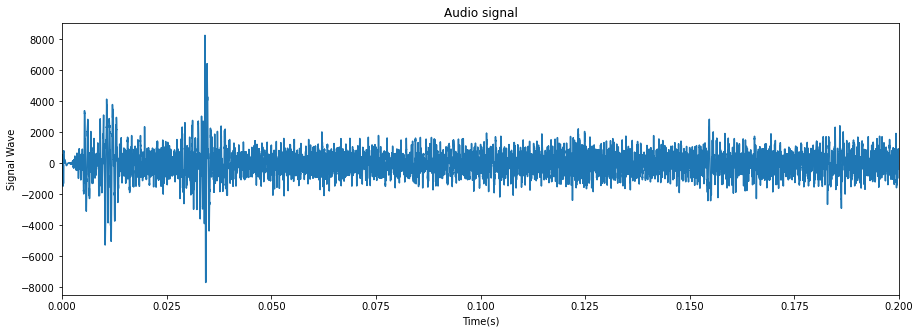

In [13]:
plt.figure(figsize=(15,5))
plt.plot(unit_time,signal_array)
plt.title("Audio signal")
plt.xlabel("Time(s)")
plt.ylabel("Signal Wave")
plt.xlim(0,time)
plt.show()

In [14]:
#recording from a mic
#Pyaudio is used for this

In [15]:
!pip install pyaudio

In [27]:
import pyaudio
import wave

In [28]:
frames_per_buffer=3200
format_of_audio = pyaudio.paInt16
channels = 1
rate = 16000

In [29]:
p=pyaudio.PyAudio()

In [30]:
stream = p.open(format=format_of_audio,
                channels=channels,
                rate=rate,
                input=True,
                frames_per_buffer=frames_per_buffer )

In [31]:
print("Start recording")
sec = 5
frames=[]
for i in range(0,int(rate/frames_per_buffer*sec)):
    data = stream.read(frames_per_buffer,exception_on_overflow=False)
    frames.append(data)
# print(frames)
stream.stop_stream()
stream.close()
p.terminate()
obj = wave.open("mic_recording.wav","wb")
obj.setnchannels(channels)
obj.setsampwidth(p.get_sample_size(format_of_audio))
obj.setframerate(rate)
obj.writeframes(b"".join(frames))
obj.close()


Start recording
